<a href="https://www.kaggle.com/code/adebayoolalekan/nlp-for-spam?scriptVersionId=204336500" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [21]:
import numpy as np # linear algebra
import pandas as pd

In [22]:
df = pd.read_csv("/kaggle/input/spam-sms-classification-using-nlp/Spam_SMS.csv")

In [23]:
df.head()

,Class,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [24]:
import nltk

In [25]:
from nltk import word_tokenize, pos_tag, ne_chunk
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
import re
import string

In [26]:
texts = df["Message"].to_list()

In [27]:
#REmove URLS and email addresses
def remove_urls_emails(text):
    text = re.sub(r'https?://\S+|www\.\S+', '', text)
    text = re.sub(r'\S+@\S+', '', text)
    return text

cleaned_texts =[remove_urls_emails(text) for text in texts]


In [28]:
#Remove numbers
def remove_numbers(text):
    return re.sub(r'\d+', '',text)
cleaned_texts =[remove_numbers(text) for text in cleaned_texts]

In [29]:
#Remove Punctuations
def remove_punctuation(text):
    return text.translate(str.maketrans('', '', string.punctuation))

cleaned_texts =[remove_punctuation(text) for text in cleaned_texts]


In [30]:
def remove_extra_spaces(text):
    return text.strip()

cleaned_texts1 =[remove_extra_spaces(text) for text in cleaned_texts]

In [31]:
#Tokenize the text
from nltk.tokenize import word_tokenize
tokenized_texts = [word_tokenize(text) for text in cleaned_texts1]
tokenized_texts 

[['Go',
  'until',
  'jurong',
  'point',
  'crazy',
  'Available',
  'only',
  'in',
  'bugis',
  'n',
  'great',
  'world',
  'la',
  'e',
  'buffet',
  'Cine',
  'there',
  'got',
  'amore',
  'wat'],
 ['Ok', 'lar', 'Joking', 'wif', 'u', 'oni'],
 ['Free',
  'entry',
  'in',
  'a',
  'wkly',
  'comp',
  'to',
  'win',
  'FA',
  'Cup',
  'final',
  'tkts',
  'st',
  'May',
  'Text',
  'FA',
  'to',
  'to',
  'receive',
  'entry',
  'questionstd',
  'txt',
  'rateTCs',
  'apply',
  'overs'],
 ['U', 'dun', 'say', 'so', 'early', 'hor', 'U', 'c', 'already', 'then', 'say'],
 ['Nah',
  'I',
  'dont',
  'think',
  'he',
  'goes',
  'to',
  'usf',
  'he',
  'lives',
  'around',
  'here',
  'though'],
 ['FreeMsg',
  'Hey',
  'there',
  'darling',
  'its',
  'been',
  'weeks',
  'now',
  'and',
  'no',
  'word',
  'back',
  'Id',
  'like',
  'some',
  'fun',
  'you',
  'up',
  'for',
  'it',
  'still',
  'Tb',
  'ok',
  'XxX',
  'std',
  'chgs',
  'to',
  'send',
  '£',
  'to',
  'rcv'],
 ['Eve

In [32]:
##REmove Stop words
from nltk.corpus import stopwords
stop_words = set(stopwords.words('english'))

def remove_stopwords(words):
    return [word for word in words if word not in stop_words]

cleaned_texts = [' '.join(remove_stopwords(words)) for words in tokenized_texts]

In [33]:
# 8. Lemmatization
stemmer = PorterStemmer()
stemmed_words = [stemmer.stem(word) for word in cleaned_texts]

In [34]:
#Convert the set into bag of words using countvectorizer class
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(max_features = 2500)
X = cv.fit_transform(stemmed_words).toarray()

In [35]:
#Y =pd.get_dummies(df['Class'])
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
y =label_encoder.fit_transform(df['Class'])

In [36]:
from sklearn.model_selection import train_test_split
X_train,X_test, Y_train,Y_test = train_test_split(X,y, test_size =0.25)

In [37]:
from sklearn.naive_bayes import MultinomialNB
model = MultinomialNB()
model.fit(X_train, Y_train)

MultinomialNB()

In [38]:
y_pred = model.predict(X_test)

In [39]:
from sklearn.metrics import classification_report
print(classification_report(Y_test,y_pred))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99      1186
           1       0.93      0.92      0.92       208

    accuracy                           0.98      1394
   macro avg       0.96      0.95      0.96      1394
weighted avg       0.98      0.98      0.98      1394



In [42]:
from sklearn import metrics
confusion_matrix = metrics.confusion_matrix(Y_test,y_pred)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [0, 1])

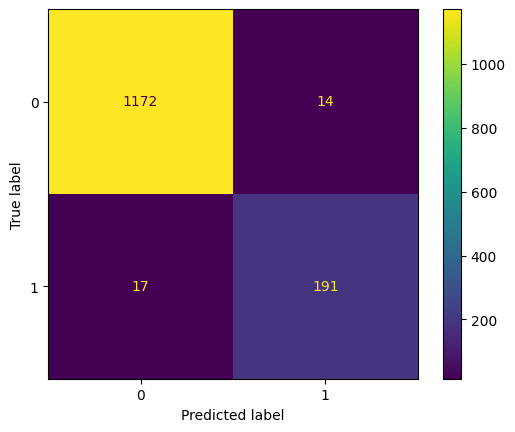

In [45]:
import matplotlib.pyplot as plt
cm_display.plot()
plt.show()

In [47]:
#To save a model
import pickle
with open('spamOrNotSpam.pkl', 'wb') as file:
    pickle.dump(model,file)